In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
df = pd.read_parquet('dataset_cdjr.parquet.gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


Verifica-se que não há dados faltantes e todos são numéricos. Agora, com o auxílio da ferramenta Pandas Profiling, podemos analisar alguns aspectos dos dados no arquivo `Análise Exploratória.html`.

In [ ]:
df.reset_index(drop=True, inplace=True)
ProfileReport(df).to_file(output_file='Análise Exploratória.html')

# Aspectos que chamaram atenção

- Boa distribuição de classes

<AxesSubplot:ylabel='target'>

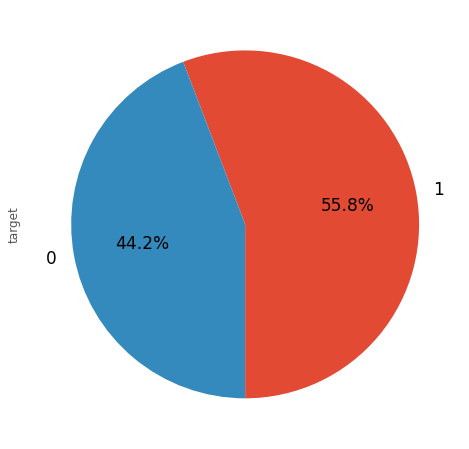

In [39]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17)

- Nenhuma feature com variância zero;
- Features com grande proporção de valores distintos (acima de 90%):
    - feature3: 98.3%
    - feature4: 94.4%
    - feature7: 100%
    - feature9: 99.8%
    - feature10: 95.7%

Apesar dessa grande proporção de valores distintos, não vemos correlação desse comportamento com a simetria da distribuição de valores. No geral, as features apresentam uma assimetria em suas distribuições de valores, em destaque para as features feature7 e feature11, como podemos ver abaixo. Essa característica pode resultar em complicações para alguns tipos de algoritmos de ML.

In [28]:
df.skew()

feature0      9.493694
feature1      2.205723
feature2      6.999722
feature3      4.690919
feature4     -9.749162
feature5      2.582785
feature6      3.601131
feature7     20.903537
feature8     13.371251
feature9      3.757792
feature10     6.910018
feature11    20.349341
feature12     8.667887
feature13     5.414284
feature14     7.948637
feature15    10.315737
target       -0.234086
dtype: float64

- Alta correlação entre features:
    - feature0 e feature15
    - feature0 e feature4
    - feature2 e feature15
    - feature4 e feature15
    - feature6 e feature9

- Relação Feature x Target: como podemos ver feature a feature no gráfico abaixo, as classes se concentram nas mesmas regiões de valores para cada feature. Porém podemos observar outliers.

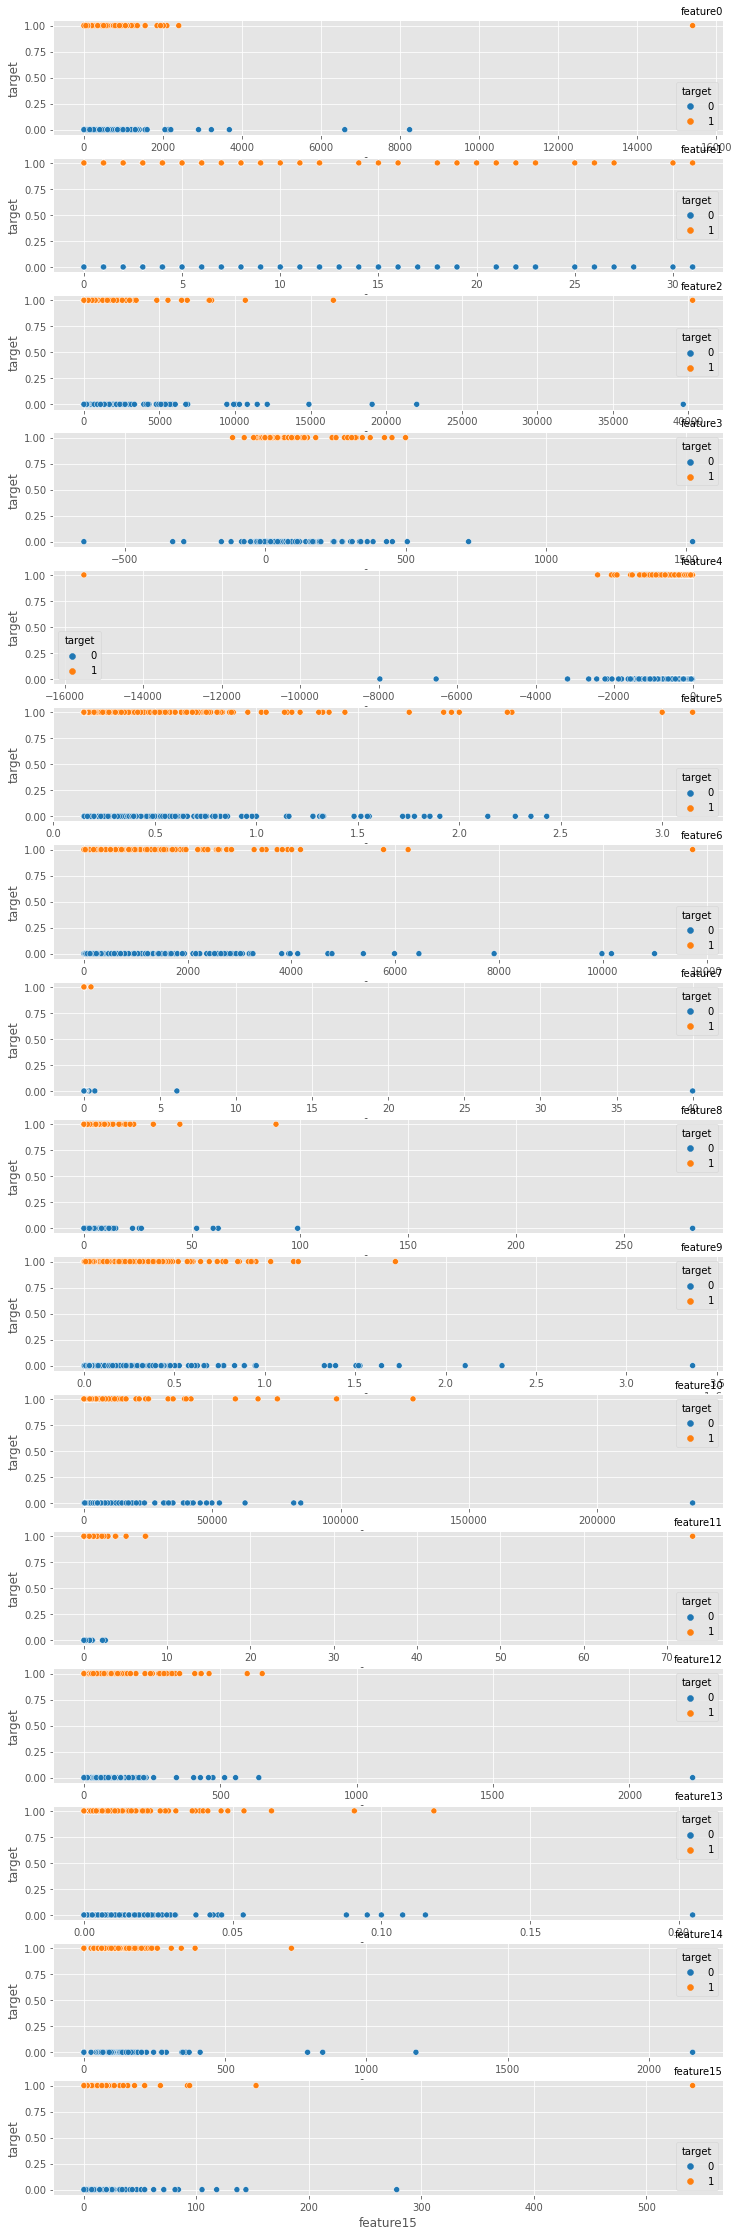

In [53]:
plt.figure(figsize=(12,40))

for i, feat in enumerate(df.columns):
    if feat=='target':continue
    plt.subplot(16,1,i+1); sns.scatterplot(data=df, x=feat,y='target',hue='target',palette='tab10')
    plt.title(feat, size=10, loc='right')